# 0. Introduction
### Group 8
  1. Ross Bennett – 13130064
  2. Joseph Tobin – 16163842
  3. Adam O'Mahony – 16187504
  4. Niall Dillane – 13132911
  
Our dataset is from https://github.com/russian-ad-explorer/russian-ad-datasets

As outlined there, it contains 3500+ ads created by Russian propagandists with the goal of influencing the 2016 election, to inflame political tensions and ultimately help elect Donald Trump.

The dataset is labelled in certain ways (e.g. interests_categories) and there are some calculated fields already included (e.g. conversion_rate), but overall it's quite messy and needed significant work to become properly usable. Even then, as we see, it's not the easiest to work with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set_palette("RdPu")
plt.style.use('ggplot')

In [2]:
df = pd.read_json("./russian_ads.json")

# 1. Exploratory Data Analysis (Ross)
See Week 3 -> Lab 2

In [3]:
df.head(5)

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
0,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",331.0,"""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,None,None,None,1.66,460.24,25.90,0.06,,Midwest_Atlantic,41
1,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",332.0,A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,None,None,None,1.63,414.72,28.83,0.07,,Midwest_Atlantic,42
2,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",333.0,2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,None,None,None,3.21,334.89,14.64,0.04,,Midwest_Atlantic,43
3,[Not Specified],[Facebook],[African American],"[Midwest, Atlantic]",334.0,Today we celebrate the legendary rapper who ev...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,153.0,10,90.07,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002120.pdf,missing_ad.png,People who like Black Matters. Friends of conn...,None,None,1.66,92.17,6.02,0.07,African American,Midwest_Atlantic,44
4,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",335.0,It is an American history. African-American ci...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,476.0,26,84.15,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002121.pdf,missing_ad.png,None,None,None,1.55,307.10,16.77,0.05,,Midwest_Atlantic,45


In [4]:
df.describe()

,ad_id,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_rub,day,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index
count,3366.000000,3516.000000,3516.000000,3.514000e+03,3517.000000,2730.000000,3517.000000,2730.000000,2545.000000,2548.000000,2600.000000,3517.000000
mean,1708.480095,17.773606,829.393060,1.154021e+04,1061.688655,2152.026484,14.906739,33.955451,1450.455847,184.536016,0.102435,1758.000000
std,1005.571728,2.726394,364.857044,4.544945e+04,3376.498875,10178.730781,7.478779,170.349380,3559.251916,402.649345,0.078389,1015.414776
min,1.000000,13.000000,17.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.860000,0.000000,0.000000,0.000000
25%,842.250000,18.000000,999.000000,0.000000e+00,0.000000,100.000000,10.000000,1.602500,160.750000,7.160000,0.050000,879.000000
50%,1683.500000,18.000000,999.000000,1.034500e+03,70.000000,300.000000,14.000000,4.900000,408.700000,33.760000,0.100000,1758.000000
75%,2550.750000,18.000000,999.000000,8.428000e+03,827.000000,700.000000,21.000000,10.750000,1334.090000,196.697500,0.150000,2637.000000
max,3519.000000,45.000000,999.000000,1.334544e+06,73063.000000,331675.750000,31.000000,6100.210000,93832.950000,7726.070000,1.690000,3516.000000


This table gives us an overview of the various numerical fields in the data. Helpful in getting a rough idea of the situation

In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

language_categories              0
placement_categories             0
interests_categories             0
location_categories              0
ad_id                          151
ad_copy                         40
ad_landing_page                 29
ad_targeting_location           31
age_lower                        1
age_upper                        1
age                              1
placements                       0
ad_impressions                   3
ad_clicks                        0
ad_spend_rub                   787
ad_creation_date                 2
month                            0
year                             0
day                              0
ad_end_date                   1144
extra_data                       1
pdf_filepath                     0
image_filepath                   0
interest_expansion             292
excluded_connections          2559
language                      1909
ad_spend_usd                   787
efficiency_impressions         972
efficiency_clicks   

This table shows the null values in this dataset

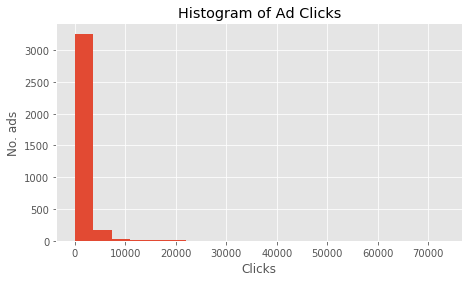

In [6]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot LoanAmount
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Ad Clicks")
ax1.set_xlabel('Clicks')
ax1.set_ylabel('No. ads')
df['ad_clicks'].hist(bins=20)

This graph shows that having most ads do not receive very many clicks, in fact almost all receive fewer than 10000.

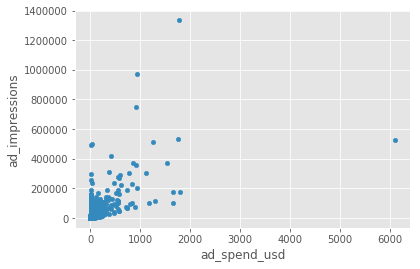

In [7]:
df.plot.scatter(x='ad_spend_usd', y='ad_impressions')

This graph shows that spending more money, in US Dollars, in advertising is beneficial to impressions until a mark is reached and spending more and more money will not promise more clicks. Diminishing returns.

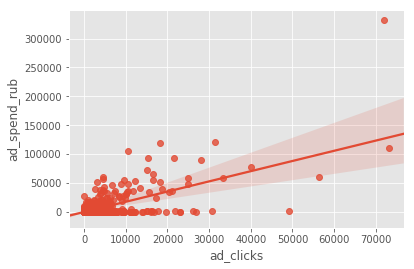

In [8]:
sns.regplot(x="ad_clicks", y="ad_spend_rub", data=df)

Similar to before, this graph shows that more expenditure increases chances of people clicking on said advertisements (this time in Russian Rubles)

Text(0, 0.5, 'no. ads')

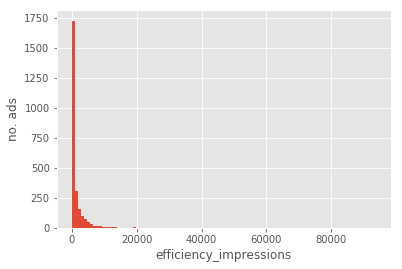

In [9]:
df['efficiency_impressions'].hist(bins=100)
plt.xlabel("efficiency_impressions")
plt.ylabel('no. ads')

Clearly there aren't many highly efficient ads!

Text(0, 0.5, 'no. ads')

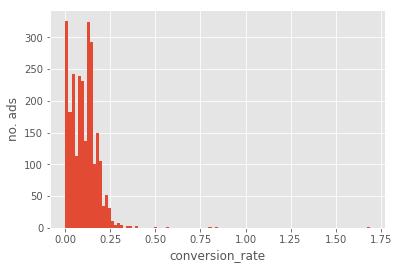

In [10]:
df['conversion_rate'].hist(bins=100)
plt.xlabel("conversion_rate")
plt.ylabel('no. ads')

Conversion rates are also low, but there is variance on the lower end of the spectrum, up until ~0.25. This could be something to explore. Maximising this rate, even if we can't aim very high on average.

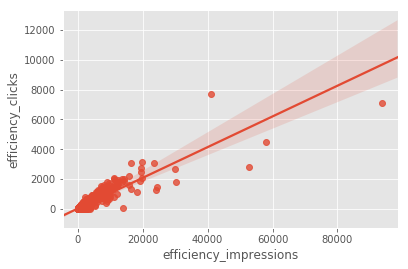

In [11]:
sns.regplot(x="efficiency_impressions", y="efficiency_clicks", data=df)

As expected, being efficient in terms of impressions is strongly correlated with efficiency in terms of clicks. This is a good sanity check on the data!

Text(0, 0.5, 'no. ads')

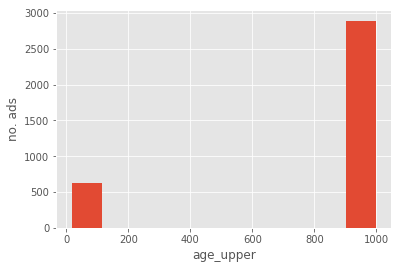

In [12]:
df['age_upper'].hist(bins=10)
plt.xlabel('age_upper')
plt.ylabel('no. ads')

The age_lower and age_upper columns are tricky. They're not very well labelled (which is fair – that's a difficult task), so there are really only two brackets. 18-65 and 18-999 (basically no upper rage). At least in this way we can identify ads that were definitely, specifically aimed towards a younger group.

There aren't many, however, as we can see the data heavily skewing towards the all-inclusive type.

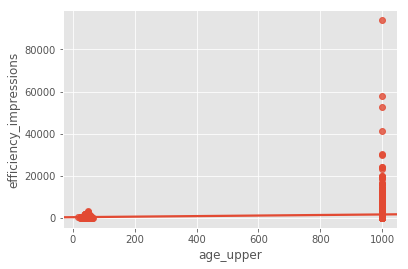

In [13]:
sns.regplot(x='age_upper', y='efficiency_impressions', data=df)

Using the pre-calculated efficiency_impressions column as a baseline, it also seems that these younger-focused ads are less effective. It's not hugely significant, but something else to investigate

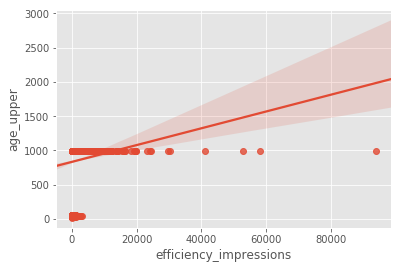

In [14]:
sns.regplot(x='efficiency_impressions', y='age_upper', data=df)

This graph actually suggests that older web users are much more suspectible to being affected by ads than younger ones, demonstrating that older users are more efficient to target in terms of ad spend (efficiency_impressions takes this into account)

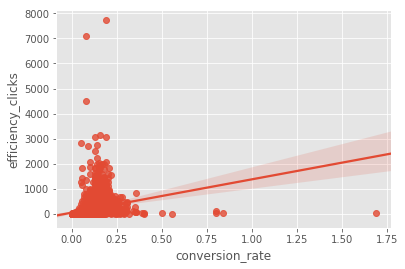

In [15]:
sns.regplot(x="conversion_rate", y="efficiency_clicks", data=df)

The graph shows as steady increase in click efficiency in proportion to conversion rate. This makes sense, since conversion rate is how many people went from an impression to a click, and click efficiency is clicks by spend.

However, there seems to be an overlapping theme of data being clumped into one cluster in the bottom left. There's not an awful lot of efficiency, and we can also see several outliers which will need to be omitted.

## Conclusions
One interesting conclusion I have drawn from these graphs is that spending more money on advertising doesn't necessarily to leaving more impressions on more people and ultimately more clicks on adverts. In general there is a mild relationship, and this wins more users over, up until a certain point when "trying too hard" and spending more and more money does not guarantee more efficient clicks or more customers. 

Age is another area to look at, but the unreliability and sparse nature of this labelling makes it difficult to look too much into.

I would like to delve more into the categorical side of things, since interest and location categories seem like important factors, but that's difficult to do before data preparation has been completed. This will follow.

There is a certain randomness to the world of propaganda and this is to be expected, but we will explore this more in the rest of the analysis.

# 2. Data Preparation (Joe)

In [16]:
df.apply(lambda x: sum(x.isnull()), axis=0)

language_categories              0
placement_categories             0
interests_categories             0
location_categories              0
ad_id                          151
ad_copy                         40
ad_landing_page                 29
ad_targeting_location           31
age_lower                        1
age_upper                        1
age                              1
placements                       0
ad_impressions                   3
ad_clicks                        0
ad_spend_rub                   787
ad_creation_date                 2
month                            0
year                             0
day                              0
ad_end_date                   1144
extra_data                       1
pdf_filepath                     0
image_filepath                   0
interest_expansion             292
excluded_connections          2559
language                      1909
ad_spend_usd                   787
efficiency_impressions         972
efficiency_clicks   

In [17]:
df[df.duplicated(["ad_id"], keep=False)]

,language_categories,placement_categories,interests_categories,location_categories,ad_id,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
114,[English],[Facebook],"[Unknown, Geographic, LGBTQ]",[],NaN,We speak for all fellow members of LGBT commun...,https://www.facebook.com/LGBT-United-839497472...,United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,06/22/2015,[06],[2015],22,None,Completed at the Direction of Ranking Memberof...,2015-06/P10005957.pdf,2015-06/P10005957.-000.png,"Motherhood, LGBT community, Indiana, Homosexua...",LGBT U,English (UK)or English (US),NaN,NaN,NaN,NaN,Unknown_Geographic_LGBTQ,,66
463,[Not Specified],[Facebook],[],[],NaN,This is the real problem,https://www.facebook.com/Stop-Refugees-8310552...,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,10/13/2015,[10],[2015],13,10/14/2015,Completed at the Direction of Ranking Memberof...,2015-10/P10006173.pdf,missing_ad.png,None,None,None,NaN,NaN,NaN,NaN,,,448
1225,[English],[Facebook],"[Products, Below Age 30]",[],NaN,Free online player: Just add in ur browser and...,https://musicfb.info/,United States,15.0,25.0,15-25,News Feed on desktop computers,0.0,0,NaN,05/12/2016,[05],[2016],12,None,Completed at the Direction of Ranking Memberof...,2016-05/P10005969.pdf,2016-05/P10005969.-000.png,Music,None,English (UK) or English (US),NaN,NaN,NaN,NaN,Products_Below Age 30,,1309
1227,[English],[Facebook],[Products],[],NaN,Free online player! Jump in the world of free ...,https://musicfb.info/,United States,13.0,30.0,13-30,News Feed on desktop computers,0.0,0,NaN,05/12/2016,[05],[2016],12,None,Completed at the Direction of Ranking Memberof...,2016-05/P10005973.pdf,2016-05/P10005973.-000.png,free music or Free softwa,None,English (UK) or English (US),NaN,NaN,NaN,NaN,Products,,1307
1228,[English],[Facebook],"[Products, Below Age 30]",[],NaN,Free online player! Jump in the world of free ...,https://musicfb.info/,United States,15.0,25.0,15-25,News Feed on desktop computers,0.0,0,NaN,05/12/2016,[05],[2016],12,None,Completed at the Direction of Ranking Memberof...,2016-05/P10005975.pdf,2016-05/P10005975.-000.png,Music,None,English (UK) or English (US),NaN,NaN,NaN,NaN,Products_Below Age 30,,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,[Not Specified],[Facebook],[Anti-Immigrant],[],NaN,This invasive war cult has no place in any civ...,https://www.facebook.com/StopAllInvaders/,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,6355.0,1015,200.00,05/17/2017,[05],[2017],17,05/19/2017,Completed at the Direction of Ranking Memberof...,2017-05/P10005883.pdf,2017-05/P10005883.-000.png,"People who like Stop A.I., Friends of connecti...",None,None,3.53,1800.28,287.54,0.16,Anti-Immigrant,,3385
3445,[English],[Facebook],[Progressive],[],NaN,Our page is the living evidence of importance ...,https://www.facebook.com/Watch-the-Police-1095...,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",955.0,50,500.00,05/18/2017,[05],[2017],18,None,Completed at the Direction of Ranking Memberof...,2017-05/P10005953.pdf,2017-05/P10005953.-000.png,"Police corruption, Filming Cops or Cop Block",Watch the P,English (UK)or English (US),8.62,110.79,5.80,0.05,Progressive,,3404
3451,[Not Specified],[Facebook],"[Unknown, African American]",[],NaN,"Explosion in Manchester, ISIS attack in Marawi...",https://www.facebook.com/WiIliamsandKalvin/,Living In: United States,18.0,999.0,18-65+,News Feed on deskt

#### Remake the ad_id column by resetting and renaming the index:

In [18]:
# Replace null values with value from list
df = df.reset_index()
df.drop(['ad_id'], axis=1, inplace=True)
df.rename(columns = {'index':'ad_id'}, inplace = True)
df

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
0,0,[Not Specified],[Facebook],[],"[Midwest, Atlantic]","""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,None,None,None,1.66,460.24,25.90,0.06,,Midwest_Atlantic,41
1,1,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,[06],[2015],15,06/16/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,None,None,None,1.63,414.72,28.83,0.07,,Midwest_Atlantic,42
2,2,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,None,None,None,3.21,334.89,14.64,0.04,,Midwest_Atlantic,43
3,3,[Not Specified],[Facebook],[African American],"[Midwest, Atlantic]",Today we celebrate the legendary rapper who ev...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,153.0,10,90.07,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002120.pdf,missing_ad.png,People who like Black Matters. Friends of conn...,None,None,1.66,92.17,6.02,0.07,African American,Midwest_Atlantic,44
4,4,[Not Specified],[Facebook],[],"[Midwest, Atlantic]",It is an American history. African-American ci...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,476.0,26,84.15,06/16/2015,[06],[2015],16,06/17/2015,Completed at the Direction of Ranking Memberof...,2015-06/P10002121.pdf,missing_ad.png,None,None,None,1.55,307.10,16.77,0.05,,Midwest_Atlantic,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,3512,[Not Specified],[Facebook],"[Conservative, Christianity, Anti-Immigrant]",[],Today Americans are able to elect a president ...,https://www.facebook.com/login/?next=https%3A%...,Living In: United States,18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,0.0,0,NaN,07/27/2017,[07],[2017],27,10/20/2016,Completed at the Direction of Ranking Memberof...,2017-07/P10003125.pdf,2017-07/P10003125.-000.png,"Stop Illegal Immigration, Laura Ingraham, FoxN...",None,None,NaN,NaN,NaN,NaN,Conservative_Christianity_Anti-Immigrant,,3514
3513,3513,[Not Specified],[Facebook],"[Conservative, Christianity, Anti-Immigrant]",[],Secured borders are a national priority. Ameri...,https://www.facebook.com/Secured.Borders/,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",3069.0,291,2095.96,07/27/2017,[07],[2017],27,07/29/2017,Completed at the Direction of Ranking Memberof...,2017-07/P1

In [19]:
df[df.duplicated(["ad_id"], keep=False)]

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index


In [20]:
df["ad_copy"] = df["ad_copy"].fillna("")
df["ad_landing_page"] = df["ad_landing_page"].fillna("")

The ad_copy feature contains information on the ad text. It is impossible to predict this based on other results unless we use some image recognition algorithm on each image. As this is outside the scope of the project I will just set all the NaN values to an empty string, we can drop these columns if necessary. This is also the case for ad_landing_page it is impossible to predict this.

In [21]:
df["ad_targeting_location"].value_counts()

United States                                                                      1348
Living In: United States                                                           1280
Living In: United States: New York (+25 mi) New York                                 53
United States: Baltimore Maryland; Ferguson, St. Louis Missouri;Cleveland Ohio       52
United States: Texas                                                                 50
                                                                                   ... 
United States: New York (+20 km) New York                                             1
United States: Austin (+10 mi) Texas                                                  1
United States: Pennsylvania                                                           1
United States: Latitude 40.73 Longitude -73.99 New York (+42 km)New York              1
United States: Florida: Georgia; New York                                             1
Name: ad_targeting_location, Len

Over 2500 rows are stated as targeted in the general area of the United States. This large proportion is enough to assume the 31 missing values could easily be targeted in the general area of the United States, thus we will set these missing values to 'United States'.

In [22]:
df["ad_targeting_location"] = df["ad_targeting_location"].fillna("United States")

In [23]:
df1 = df[df["age"].isna()]

In [24]:
df1

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,ad_end_date,extra_data,pdf_filepath,image_filepath,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,interests_categories_regex,location_categories_regex,date_order_index
2211,2211,[Not Specified],[Facebook],"[Unknown, African American]",[],"Joshua was born in Chicago, Illinois, and rais...",https://www.facebook.com/Woke-Blacks-294234600...,Living In: United States,NaN,NaN,None,News Feed on desktop computers or News Feed on...,4736.0,557,65.0,11/08/2016,[11],[2016],8,11/09/2016,Completed at the Direction of Ranking Memberof...,2016-11/P10005753.pdf,2016-11/P10005753.-000.png,"Martin Luther King, Jr., African-American Civi...",None,None,1.02,4643.14,546.08,0.12,Unknown_African American,,2218


As we can see the same row that age is missing in is the same row than age_lower and age_upper is missing in. Since this is a single row, it is not worth our time to predict these values so we will drop the column.

In [25]:
df = df.drop([2211])

For ad_impressions I do not want to just use mean value to fill in the 3 missing rows as I think it is a feature of too much importance to just fill in mean values. Since there are only 3 rows with missings values for this, it is again not worth our time to try and predict the value by any more complex method that might be more accurate than mean, thus we drop the rows.

In [26]:
df = df[pd.notnull(df['ad_impressions'])]

In [27]:
df[df["ad_spend_rub"].isna()][df.columns[df.isna().any()]]

,ad_spend_rub,ad_creation_date,ad_end_date,extra_data,interest_expansion,excluded_connections,language,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate
11,NaN,06/24/2015,06/25/2015,Completed at the Direction of Ranking Memberof...,People who like Black Matters. Friends of conn...,None,None,NaN,NaN,NaN,NaN
13,NaN,06/18/2015,06/19/2015,Completed at the Direction of Ranking Memberof...,"People who like Black Matters, Friends of conn...",None,None,NaN,NaN,NaN,NaN
14,NaN,06/09/2015,06/10/2015,Completed at the Direction of Ranking Memberof...,None,None,None,NaN,NaN,NaN,NaN
16,NaN,06/23/2015,None,Completed at the Direction of Ranking Memberof...,Independence or Patriotism,Being P,English (UK)or English (US),NaN,NaN,NaN,NaN
18,NaN,06/10/2015,None,Completed at the Direction of Ranking Memberof...,None,Black M,English (UK)or English (US),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3478,NaN,05/04/2017,05/07/2017,Completed at the Direction of Ranking Memberof...,"Martin Luther King, Jr., African-American Civi...",None,None,NaN,NaN,NaN,NaN
3488,NaN,05/18/2017,None,Completed at the Direction of Ranking Memberof...,"Deportation, Stop Illegal Immigration, Illegal...",Stop A.1.,English (UK)or English (US),NaN,NaN,NaN,NaN
3510,NaN,07/16/2017,07/19/2017,Completed at the Direction of Ranking Memberof...,"Immigration to the United States, Conservatism...",Secured B,None,NaN,NaN,NaN,NaN
3512,NaN,07/27/2017,10/20/2016,Completed at the Direction of Ranking Memberof...,"Stop Illegal Immigration, Laura Ingraham, FoxN...",None,None,NaN,NaN,NaN,NaN


Approx 25% of the data is missing values for ad_spend_rub(usd). Normally, one would drop that column but since it is a column of serious importance that is unviable. One could predict the value by finding a correlation between it and other columns, simply by average or other methods. This may compromise the integrity of the dataset though by setting incorrect datas to such an important column, thus we have decided to drop the rows with missing values for ad_spend_rub(usd) as we will still have over 2000 rows.

In [28]:
df = df[pd.notnull(df['ad_spend_rub'])]

ad_creation_date and extra_data have 2 and 1 missing values respectively, we will drop these rows.

In [29]:
df = df[pd.notnull(df['ad_creation_date'])]
df = df[pd.notnull(df['extra_data'])]

excluded_connections and language have much more than 25% missing values, and as they are of little importance we drop the columns.

In [30]:
df = df.drop(['excluded_connections'], axis = 1)
df = df.drop(['language'], axis = 1)


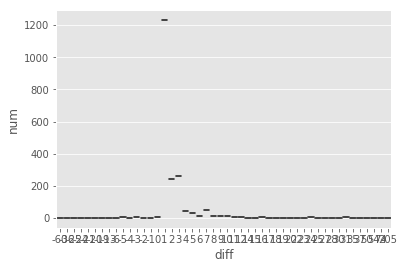

In [31]:
dfDates = df[['ad_creation_date', 'ad_end_date']].dropna()

dfDates['ad_end_date'] = pd.to_datetime(dfDates['ad_end_date'])
dfDates['ad_creation_date'] = pd.to_datetime(dfDates['ad_creation_date'])
dfDates['diff'] = dfDates['ad_end_date'] - dfDates['ad_creation_date']

dfDates = dfDates.groupby('diff', as_index=False).count()

dfDates = dfDates.drop(['ad_creation_date'], axis = 1)
dfDates.columns = ['diff', 'num']

dfDates['diff'] = dfDates['diff'].astype(str)
dfDates['diff'] = dfDates['diff'].str.split().str.get(0)
dfDates['diff'] = dfDates['diff'].astype(int)

ax = sns.boxplot(x="diff", y="num", data=dfDates)

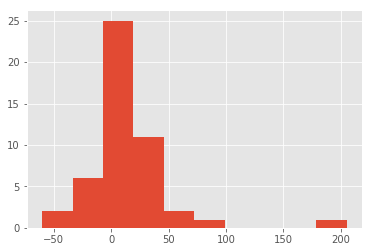

In [32]:
dfDates['diff'].hist(bins=10)

With over 25% of rows missing data for ad_end_date and values being scattered we will drop the column

In [33]:
df = df.drop(['ad_end_date'], axis = 1)

In [34]:
df.corr()

,ad_id,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_rub,day,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index
ad_id,1.000000,0.004254,0.230535,0.045792,0.133679,-0.098726,0.159173,-0.089618,0.292770,0.361371,0.224432,0.993630
age_lower,0.004254,1.000000,0.106767,-0.054593,-0.038711,0.011223,-0.000555,0.014551,-0.102872,-0.096101,-0.007520,0.002506
age_upper,0.230535,0.106767,1.000000,0.029908,0.082511,-0.017433,0.070647,-0.010237,0.126674,0.153801,0.219574,0.230836
ad_impressions,0.045792,-0.054593,0.029908,1.000000,0.890688,0.633649,-0.035736,0.614588,0.271607,0.223252,-0.047721,0.046087
ad_clicks,0.133679,-0.038711,0.082511,0.890688,1.000000,0.654923,-0.011791,0.653595,0.401290,0.431378,0.097013,0.135243
ad_spend_rub,-0.098726,0.011223,-0.017433,0.633649,0.654923,1.000000,-0.023791,0.994651,-0.062938,-0.079554,-0.072625,-0.102656
day,0.159173,-0.000555,0.070647,-0.035736,-0.011791,-0.023791,1.000000,-0.018886,0.002429,0.019760,0.099594,0.201226
ad_spend_usd,-0.089618,0.014551,-0.010237,0.614588,0.653595,0.994651,-0.018886,1.000000,-0.058813,-0.074124,-0.065163,-0.093188
efficiency_impressions,0.292770,-0.102872,0.126674,0.271607,0.401290,-0.062938,0.002429,-0.058813,1.000000,0.908252,0.119947,0.292878
efficiency_clicks,0.361371,-0.096101,0.153801,0.223252,0.431378,-0.079554,0.019760,-0.074124,0.908252,1.000000,0.256620,0.361716


With no real correlation between efficiency_clicks and efficiency_impressions and conversion_rate with any other column, it will be difficult to impute the values with any other way other than averaging, thus we will set the missing values to be the median.

In [35]:
df['efficiency_clicks'] = df['efficiency_clicks'].fillna(df['efficiency_clicks'].median())
df['efficiency_impressions'] = df['efficiency_impressions'].fillna(df['efficiency_impressions'].median())
df['conversion_rate'] = df['conversion_rate'].fillna(df['conversion_rate'].median())

##### Our binarizer fills the role of the interest and location expansion columns, we will drop these columns:

In [36]:
df = df.drop(['interest_expansion', 'location_categories_regex', 'interests_categories_regex'], axis = 1)

### OUTLIERS

In [37]:
dfnocat = df.select_dtypes([np.number])
zs = np.abs(stats.zscore(dfnocat))
threshold = 3
df = df[(zs < 3).all(axis=1)]

In [38]:
df.interests_categories = df.interests_categories.apply(lambda y: np.array(['Unknown']) if len(y)==0 else y)
df.location_categories = df.location_categories.apply(lambda y: np.array(['location_unknown']) if len(y)==0 else y)

#### Converting lists to tuples

In [39]:
listCols = ['language_categories', 'placement_categories', 'interests_categories', 'location_categories']
dateCols = ['month', 'year']

for col in listCols:
    df[col] = df[col].transform(tuple)

for col in dateCols:
    df[col] = df[col].apply(''.join).astype(int)
    
df.head(5)

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,extra_data,pdf_filepath,image_filepath,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index
0,0,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)","""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,1.66,460.24,25.90,0.06,41
1,1,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,1.63,414.72,28.83,0.07,42
2,2,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,3.21,334.89,14.64,0.04,43
3,3,"(Not Specified,)","(Facebook,)","(African American,)","(Midwest, Atlantic)",Today we celebrate the legendary rapper who ev...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,153.0,10,90.07,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002120.pdf,missing_ad.png,1.66,92.17,6.02,0.07,44
4,4,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",It is an American history. African-American ci...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,476.0,26,84.15,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002121.pdf,missing_ad.png,1.55,307.10,16.77,0.05,45


### Binarizing Interests & Locations

#### Replace empty lists with unknown:

In [40]:
df.interests_categories = df.interests_categories.apply(lambda y: np.array(['interest_unknown']) if len(y)==0 else y)
df.location_categories = df.location_categories.apply(lambda y: np.array(['location_unknown']) if len(y)==0 else y)

#### Binarize the list columns we're interested in:

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

cols = ['interests_categories', 'location_categories']
dfEncoded = df[['interests_categories', 'location_categories', 'ad_id']]
mlb = MultiLabelBinarizer()
for col in cols:
    dfEncoded = dfEncoded.join(pd.DataFrame(mlb.fit_transform(dfEncoded.pop(col)),
                                            columns=mlb.classes_,
                                            index=dfEncoded.index))

#### Merge back into dataset:

In [42]:
df = pd.merge(df, dfEncoded, on='ad_id', how='inner')

In [43]:
df.head(3)

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,extra_data,pdf_filepath,image_filepath,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index,African American,American South,Anti-Immigrant,Army,Below Age 30,Christianity,Conservative,Geographic,Gun Rights,Islam,LGBTQ,Latinx,Memes,Memes and Products,Native American,Patriotism,Police,Prison,Products,Progressive,Self-Defense,Texas,Unknown,Atlantic,Midwest,Non-US,Northeast,Pacific,Southwest,The South,location_unknown
0,0,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)","""Free Figure's Black Power Rally at VCU:""",https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland: Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,764.0,43,90.86,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002117.pdf,missing_ad.png,1.66,460.24,25.90,0.06,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,1,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",A woman pretended Afro-American to gain contro...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,676.0,47,89.51,06/15/2015,6,2015,15,Completed at the Direction of Ranking Memberof...,2015-06/P10002118.pdf,missing_ad.png,1.63,414.72,28.83,0.07,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
2,2,"(Not Specified,)","(Facebook,)","(Unknown,)","(Midwest, Atlantic)",2Pac believed in FightTupac Shakur was indeed ...,https://www.facebook.com/Black-Matters-1579673...,"United States: Baltimore Maryland; Ferguson, S...",18.0,999.0,18-65+,News Feed on desktop computers or News Feed on...,1075.0,47,174.40,06/16/2015,6,2015,16,Completed at the Direction of Ranking Memberof...,2015-06/P10002119.pdf,missing_ad.png,3.21,334.89,14.64,0.04,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0


# 3. Pipelines, incl. Classifiers, Feature Selection (Adam)

While the values of a column like 'efficiency_impressions' or 'efficiency_clicks' seem as though they would be intesting, these column have been calculated by other columns and as such would not be very interesting to predict.
Because of this, we aim to predict the number of impressions an add gets based on it's other attributes

**Drop unwanted columns**
We will first drop a few columns that will not add to our model in prediciting our desired feature.
We are dropping *ad_clicks, efficiency_impressions, efficiency_clicks* and *conversion_rate*.

*ad_clicks* is a percentage of our desired column and therefore does not effect the value of *ad_impressions*.
We decided to also drop the efficiency and conversion rate columns due to them being calculated from other columns

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# drop categorical data columns that have been expanded and converted to numerical data 
dfPipe = df.select_dtypes(exclude=['object'])
dfPipe = dfPipe.drop(['ad_clicks', 'efficiency_impressions', 'efficiency_clicks', 'conversion_rate'], axis=1)

**Split the data set**
Here we drop the target attribute *ad_impressions* and split both predictor and target set into 80% train, 20% train

In [45]:
X = dfPipe.drop('ad_impressions', axis=1).values
target = dfPipe['ad_impressions']
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.2)

Scale data with a standard scaler. A StandardScaler was used insead of other options, such as MinMaxScaler as not ass not all of the data we are looking at is binary, Columns which are binary, the values have already been set to 0 or 1.

In [46]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler(with_mean=False)

In [47]:
dfAccs = pd.DataFrame(columns = ['classifier', 'score'])

Classifiers choosen according to [this](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) link. We followed Scikit suggestion based on the type of data we have in our DataFram

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE, RFECV, mutual_info_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

selectors = [
    (RFE(SVR(kernel='linear')), 'SVR'),
    (RFE(LinearSVR()), 'LinearSVR'),
    (RFE(Ridge(alpha=0.5)), 'Ridge0.5'),
    (RFE(Lasso(alpha=0.2)), 'Lasso0.2')
    ]

highestAcc = 0
bestModel = None

for selector in selectors:
    model = Pipeline(steps=[('scaler', std_scaler),
                            ('feature_selector', selector[0]),
                            ('classifier', LinearSVR())
                           ])
    kfold = KFold(n_splits=3, random_state=1024)
    accuracies = cross_val_score(model, X, target, cv=kfold, scoring='explained_variance')
    if(np.mean(accuracies) > highestAcc):
        highestAcc = np.mean(accuracies)
        bestModel = model
    dfAccs = dfAccs.append({'classifier':selector[1], 'score':np.mean(accuracies)}, ignore_index=True)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
dfAccs

,classifier,score
0,SVR,0.059693
1,LinearSVR,0.069695
2,Ridge0.5,0.055728
3,Lasso0.2,0.059221


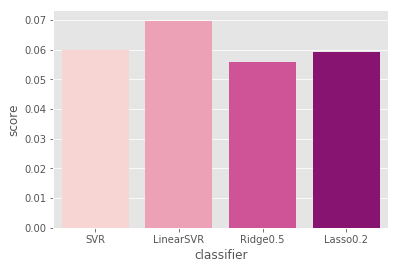

In [50]:
sns.barplot(x="classifier", y="score", palette='RdPu', data=dfAccs)

We can see from both the DafaFrame and the barplot above that using the LinearSVR is the classifier best fit to this data set. While, it's mean cross validation score is roughly x2 compare to Ridge and Lasso and both SVR and NuSVR are near zero or negative, none of the classifiers produce a good predictive model - each model has CV score < 0.1

* **Issues encountered**  When attempting to us the LogisticRegression classifier, we were unable to find paramteres that allowed it to converge with this dataset, hence it is excluded from the list of classifiers


**Making a prediction** 
From our testing we can see that either ridge or Lasso will predict correctly a little over 50% of the time. As one of these is our best model, we will attempt to make a prediction using that model

In [51]:
std_scaler.fit(X_test)
bestModel.fit(X_test, target_test)
target_predicted = bestModel.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(target_test, target_predicted))
rms

18867.107431885186

**RMSE conclusion**
This is not good, there is a huge amount of varience in the data set and making predictions is not easy.

# 4. Clustering and Manifold Learning (Niall)

### Importing modules, data

In [53]:
from itertools import cycle

from sklearn import manifold # for MDS and t-SNE
from sklearn import cluster # for k-Means clustering
from sklearn import preprocessing # for scaling attributes to the interval [0,1]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation

#### Scatterplot function
From lab 6

In [54]:
colors = np.array(['orange', 'blue', 'green', 'black', 'pink', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [55]:
dfCluster = df # Prepped dataset

In [56]:
dfCluster['num_interests'] = dfCluster['interests_categories'].str.len()
dfCluster['num_locs'] = dfCluster['location_categories'].str.len()

In [57]:
dfCluster.tail(3)

,ad_id,language_categories,placement_categories,interests_categories,location_categories,ad_copy,ad_landing_page,ad_targeting_location,age_lower,age_upper,age,placements,ad_impressions,ad_clicks,ad_spend_rub,ad_creation_date,month,year,day,extra_data,pdf_filepath,image_filepath,ad_spend_usd,efficiency_impressions,efficiency_clicks,conversion_rate,date_order_index,African American,American South,Anti-Immigrant,Army,Below Age 30,Christianity,Conservative,Geographic,Gun Rights,Islam,LGBTQ,Latinx,Memes,Memes and Products,Native American,Patriotism,Police,Prison,Products,Progressive,Self-Defense,Texas,Unknown,Atlantic,Midwest,Non-US,Northeast,Pacific,Southwest,The South,location_unknown,num_interests,num_locs
2568,3511,"(Not Specified,)","(Facebook,)","(Police, Progressive, Unknown, Conservative, A...","(location_unknown,)",Secured borders should be a top priority. We n...,https://www.facebook.com/Secured.Borders/,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",1706.0,194,1625.79,07/16/2017,7,2017,16,Completed at the Direction of Ranking Memberof...,2017-07/P10003121.pdf,2017-07/P10003121.-000.png,27.39,62.29,7.08,0.11,3513,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,6,1
2569,3513,"(Not Specified,)","(Facebook,)","(Conservative, Christianity, Anti-Immigrant)","(location_unknown,)",Secured borders are a national priority. Ameri...,https://www.facebook.com/Secured.Borders/,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",3069.0,291,2095.96,07/27/2017,7,2017,27,Completed at the Direction of Ranking Memberof...,2017-07/P10003127.pdf,2017-07/P10003127.-000.png,35.18,87.24,8.27,0.09,3515,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1
2570,3516,"(Not Specified,)","(Facebook,)","(Conservative, Christianity, Anti-Immigrant)","(location_unknown,)",Secured borders are a national priority. Ameri...,https://www.facebook.com/Secured.Borders/,Living In: United States,18.0,999.0,18-65+,"News Feed on desktop computers, News Feed on m...",2781.0,282,2094.74,08/13/2017,8,2017,13,Completed at the Direction of Ranking Memberof...,2017-08/P10003115.pdf,2017-08/P10003115.-000.png,35.03,79.39,8.05,0.10,3516,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1


### Making a dataset out of numeric fields

In [58]:
dfNum = dfCluster[['age_lower', 'age_upper', 'ad_impressions', 'ad_clicks', 'ad_spend_usd', 'month', 'year', 'num_interests', 'num_locs']]
#dfNum['ad_id'] = range(1, len(dfNum) + 1)

dfNum = dfNum.dropna()
num_data = np.array(dfNum.values, dtype=float)

cluster_data = np.array(dfNum.values, dtype=float)
print('(number of examples, number of attributes): ', cluster_data.shape)

(number of examples, number of attributes):  (2571, 9)


### Scaling the data

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
num_data = min_max_scaler.fit_transform(num_data)

## K-means Clustering

### Best Value of k?

#### Elbow Method

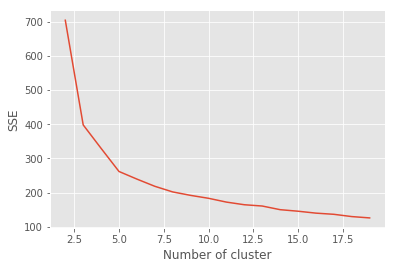

In [60]:
sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(num_data)
    #numEncode_data['clusters'] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Silhouette Coefficient Method

In [61]:
for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(num_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(num_data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44593106415563655
For n_clusters=3, The Silhouette Coefficient is 0.4517430003363804
For n_clusters=4, The Silhouette Coefficient is 0.42740277006640515
For n_clusters=5, The Silhouette Coefficient is 0.4605115419203761
For n_clusters=6, The Silhouette Coefficient is 0.4384594679575901
For n_clusters=7, The Silhouette Coefficient is 0.4177170712026384
For n_clusters=8, The Silhouette Coefficient is 0.4199329475383676
For n_clusters=9, The Silhouette Coefficient is 0.3985177716915885
For n_clusters=10, The Silhouette Coefficient is 0.3980360212763461
For n_clusters=11, The Silhouette Coefficient is 0.32332627600203684
For n_clusters=12, The Silhouette Coefficient is 0.3131665926211555
For n_clusters=13, The Silhouette Coefficient is 0.37490596274937743
For n_clusters=14, The Silhouette Coefficient is 0.36773626330178305
For n_clusters=15, The Silhouette Coefficient is 0.3038153740419415
For n_clusters=16, The Silhouette Coefficient is 0.

Initially I ran these tests with all of the data – lists binarized into separate columns for each element as per data prep. Both of these methods left an unclear picture re: the optimal value of K.

Our Elbow method produced something not very elbow-looking, and the Silhouette method seemed to be constantly increasing, suggesting that the data is just too varied to produce a small number of clusters. I tested values from 1 to 20 and there just didn't seem to be a good fit.

I experimented with dropping binarized columns (placement categories, interest categories, location categories), and while this did produce better looking k-means graphs, I doubted the usefulness of such clusters. That just left me with [age, impressions, clicks, ad spend, month, year], which wasn't very interesting. 

However, I ultimately realised that the prime motivation behind this propaganda was to sow discord, create confusion, and extremify society as a whole. Trying to find clear patterns in interests/locations is going to be nigh on impossible. Therefore, I settled on focusing on the pure numbers, the columns I mentioned above, as well as adding new columns simply for the number of interests and number of locations targeted. This was to get an idea of how focused the ads were.

With this in mind, both the Elbow and Silhouette methods pointed towards 5 being the optimal value of k.

In [62]:
k = 5
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(num_data)

### Manifold Learning

In [63]:
# append the cluster centers to the dataset
num_data_and_centers = np.r_[num_data, clustered_data_sklearn.cluster_centers_]

####  Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space¶

In [64]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(num_data_and_centers)
print("transformation complete")

transformation complete


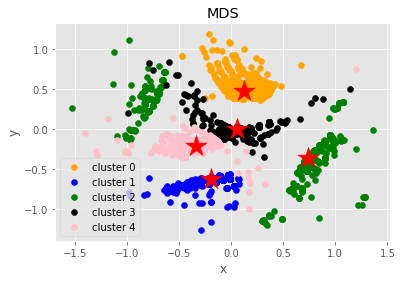

In [65]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [66]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(num_data_and_centers)
print("transformation complete")

transformation complete


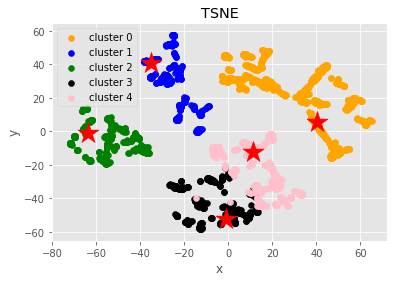

In [67]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Clutster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [68]:
dfNum['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=dfNum.index)

In [69]:
dfNum.head()

,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_usd,month,year,num_interests,num_locs,cluster
0,18.0,999.0,764.0,43,1.66,6,2015,1,2,1
1,18.0,999.0,676.0,47,1.63,6,2015,1,2,1
2,18.0,999.0,1075.0,47,3.21,6,2015,1,2,1
3,18.0,999.0,153.0,10,1.66,6,2015,1,2,1
4,18.0,999.0,476.0,26,1.55,6,2015,1,2,1


In [70]:
dfNum.groupby('cluster').mean()

,age_lower,age_upper,ad_impressions,ad_clicks,ad_spend_usd,month,year,num_interests,num_locs
cluster,,,,,,,,,
0,17.752941,999.000000,11025.541176,1432.725882,10.222824,3.654118,2017.000000,1.662353,1.003529
1,17.893401,999.000000,4742.550761,277.134518,20.096904,8.347716,2015.000000,1.192893,1.492386
2,16.834928,46.992823,7316.645933,426.942584,21.722249,5.184211,2016.014354,1.655502,1.263158
3,17.588235,999.000000,9206.484706,704.397647,23.753294,4.348235,2016.000000,1.470588,1.028235
4,17.586777,999.000000,10601.657025,988.082645,25.854112,10.446281,2016.000000,1.727273,1.026860


### Conclusions
The plots produced are fairly solid and discrete, considering the nature of the data, with the MDS production probably being the better of the two.

The column for number of locations probably isn't very reliable here, since there are many missing values.

Looking into the data, we can make some rough conclusions about the nature of each cluster (Note: I've noticed that on re-running, the order of the clusters, and maybe even the data that makes them up, can change. This is my original analysis):

  0. There's nothing that stands out here, so these could be seen as an average ad. All age ranges, with a high average spend but average impressions and clicks. These were somewhat targeted ads, with an average level of interests targeted but  in a narrow range of locations, and were posted midway in the campaign, ~ April 2016. 
  
  
  1. These were the highest spend ads, which makes sense as they were late in the campaign (~ October 2016) so advertising would be more expensive. They're also the least targeted in terms of interests, but among the most focused in location.  They were rewarded for this, with second-best impressions and clicks.
  
  2. These had moderate-high spend, during the heat of the election (~ May 2016), but had low impresions and clicks. As this cluster is the only one which targeted younger age groups (lower age_upper), this could suggest that younger age groups are less vulnerable to this type of propaganda.
  
  3. This is a very interesting group, with the lowest spend, yet the highest impressions and clicks. Not only this, but their conversion rate from impressions to clicks is top level. Again they went for broad interest ranges but narrow on locations – **this may be the key**. They also took place after the campaign (~ March 2017), showing that this is an ongoing effort and tensions were (and still are) high. Ads are also less expensive at this time.
  
  4. These were posted early in the campaign (~ August 2015), and with moderate spend, but they were very ineffective in terms of impressions and clicks, the lowest overall. Possibly the race just wasn't intense enough at this point, but we also see that it's narrow in interests and broad in location – opposite to the more successful groups. At the very least, it's clear the propaganda effort began early and with high investment, and perhaps this was the right strategy at the time, in order to lay the groundwork.

## Affinity Propagation
Chosen for its strength in "Many clusters, uneven cluster size, non-flat geometry"

In [71]:
af_clustering = AffinityPropagation(max_iter=300).fit(num_data)

##### Based on https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html

In [72]:
cluster_centers_indices = af_clustering.cluster_centers_indices_
labels = af_clustering.labels_

n_clusters_ = len(cluster_centers_indices)

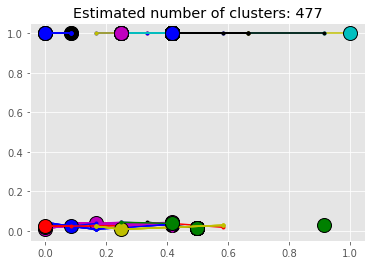

In [73]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = num_data[cluster_centers_indices[k]]
    plt.plot(num_data[class_members, 0], num_data[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in num_data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 5. Overall Conclusion
#### What happened?!
As we can see, this graph is a mess. I was recommended 477 clusters, compared to the 5 from k-means above. I tried multiple different techniques here (Spectral Clustering for clustering, Spectral Embedding and TSNE for manifold learning), but none of them took well. 

I think what this shows is that, without enforcing a preset number of clusters, these algorithms simply cannot handle the variance of the dataset. Our pipelines also similarly poor performance. There are two possible conclusions from this.

It's possible that there simply aren't enough samples in the dataset. For such a huge issue, we need more data to understand what's going on.

However, I theorise that even with increased samples, or better labelled ones, we still wouldn't have a clear picture. This demonstrates the effective "randomness" of propaganda. Vladislav Surkov is one of Putin's most senior aides, and known to be the main author of Russia's propaganda network. 

Without going too deep into political theory, his approach has been described as a "dizzying media blitzkrieg of political repression and postmodern propaganda", meaning that it's not as simple as pushing one message, but rather pushing all kinds of messages at the same time, creating such mass confusion that the people simply give up. In this way, they are much easier to mold and accept what you say.

I believe we can see hints of this in my attempts to create clusters from the dataset. It's all over the place, unclear, hard to decipher any clear pattern. I would argue this isn't a fault of mine or the dataset, but rather the explicit strategy being employed.